# Abalone Case Study

# OBJECTIVE:
    
    The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings      through a microscope.The number of rings is the value to predict.

# Importing Required Libraries:

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [34]:
df=pd.read_csv('Abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [37]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
173,F,0.520,0.405,0.115,0.7760,0.3200,0.1845,0.220,8
2519,I,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.172,7
298,M,0.490,0.395,0.140,0.5490,0.2215,0.1275,0.150,11


In [38]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3107,I,0.370,0.275,0.100,0.2815,0.1505,0.0505,0.0680,5
1534,I,0.300,0.230,0.085,0.1170,0.0500,0.0175,0.0415,6
1113,I,0.525,0.400,0.130,0.6455,0.3250,0.1245,0.1700,8


In [39]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [40]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [41]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


As we can see, the feature Sex is missing. This is because the values of Sex are categorical and categorical values do not have means and percentiles.

A point to note here: ML models find it difficult to work with values of different types (such as both categorical and numeric, as is the case here) at the same time.

This is why we will convert Sex by doing something called one-hot encoding which is basically converting a categorical feature into binary numeric feature(s) indicating the presence or absence of the values that were originally there in the categorical feature.

In [42]:
#Checking for null or missing values.
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


# Visualization

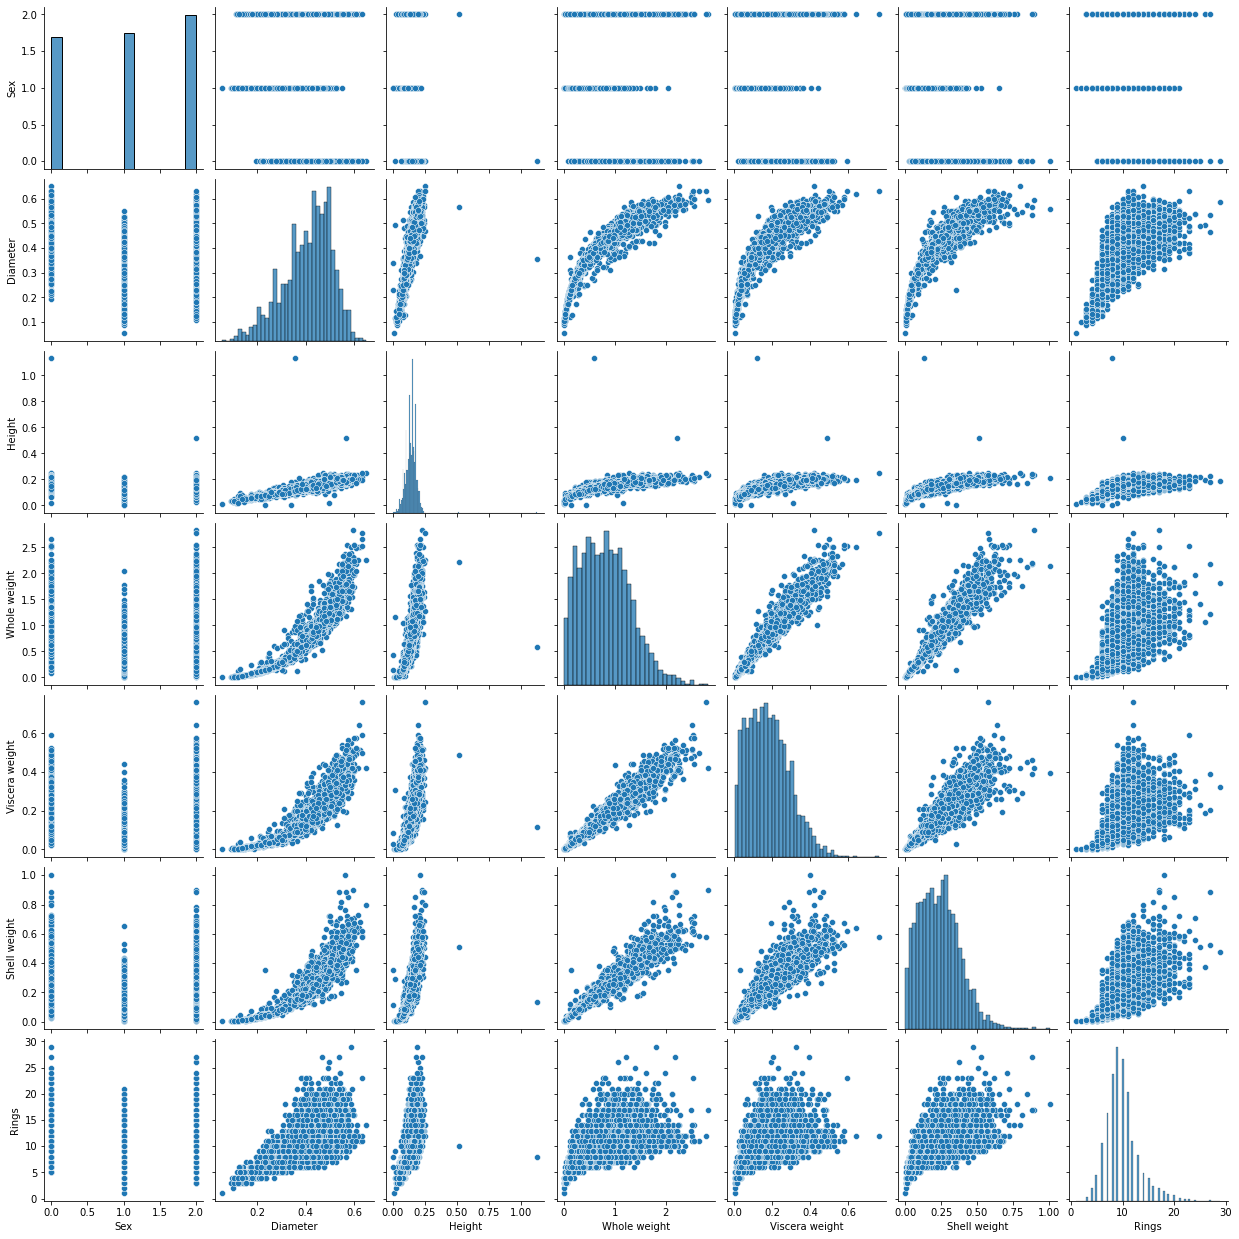

In [100]:
#pairplot
sns.pairplot(df)


According to this pair plot, we can grasp important relationship. When we focus on the age row, height seems to have little correlation. But in addition to this, other variables seems to have same kind of correlation.

In [102]:
# checking the columns of the data
df.columns

Index(['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight',
       'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

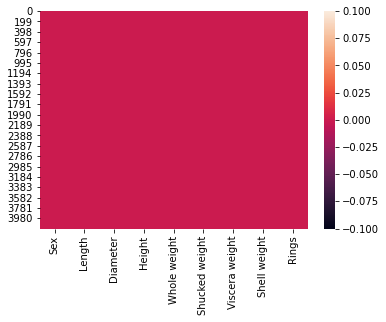

In [44]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

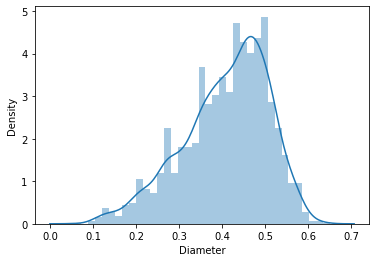

In [45]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

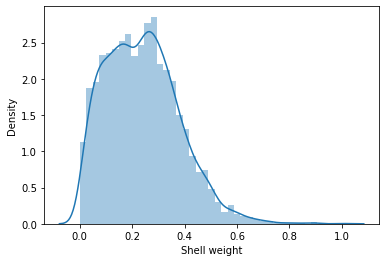

In [46]:
sns.distplot(df['Shell weight'])

In [47]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [49]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [52]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Height', ylabel='Density'>

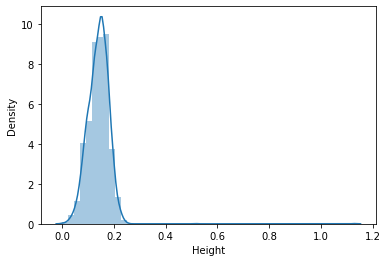

In [53]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

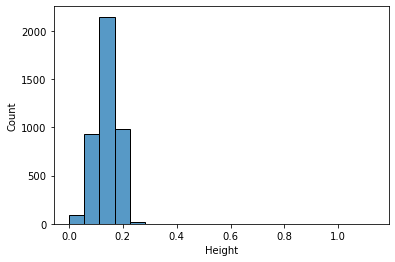

In [54]:
sns.histplot(df['Height'],bins=20)

In [55]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [56]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

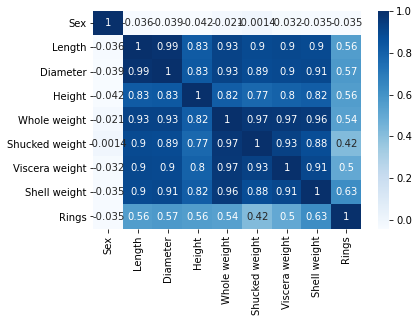

In [57]:
#Annotation

sns.heatmap(df.corr(),cmap="Blues",annot=True)

<AxesSubplot:>

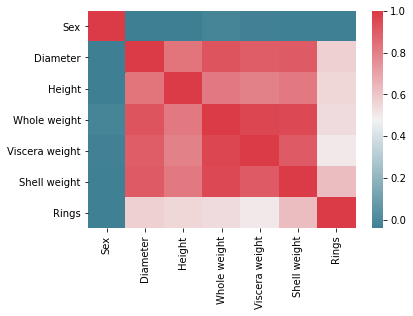

In [104]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True))


Length and diameter are perfectly correlated. The circumfrence of an ellipse is proportional to its length with the constant of proportionality determined by its eccentricity.Almost everything is strongly correlated with everything else, except ring count.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [60]:
x.shape

(4177, 8)

In [62]:
x.shape[1]

8

In [63]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [64]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [65]:
vif_calc()

   VIF Factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


Data Cleansing

Feature engineering ----- Selection of feature/variables/columns

Detect outliers / remove

In [67]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [68]:
x=df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [69]:
x.shape

(4177, 6)

In [70]:
vif_calc()

   VIF Factor        features
0    2.532536             Sex
1   46.978990        Diameter
2   41.650431          Height
3  123.993316    Whole weight
4   59.292682  Viscera weight
5   49.403495    Shell weight


<AxesSubplot:>

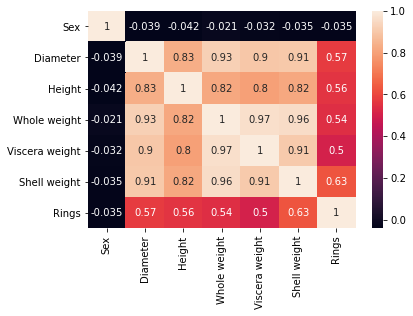

In [71]:
sns.heatmap(df.corr(),annot=True)

In [72]:
x=df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [73]:
x.shape

(4177, 6)

In [74]:
y.shape

(4177,)

In [75]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15198011, -0.43214879, -1.06442415, -0.64189823, -0.72621157,
        -0.63821689],
       [ 1.15198011, -1.439929  , -1.18397831, -1.23027711, -1.20522124,
        -1.21298732],
       [-1.28068972,  0.12213032, -0.10799087, -0.30946926, -0.35668983,
        -0.20713907],
       ...,
       [ 1.15198011,  0.67640943,  1.56576738,  0.70821206,  0.97541324,
         0.49695471],
       [-1.28068972,  0.77718745,  0.25067161,  0.54199757,  0.73362741,
         0.41073914],
       [ 1.15198011,  1.48263359,  1.32665906,  2.28368063,  1.78744868,
         1.84048058]])

In [76]:
x.shape

(4177, 6)

# PREPROCESSING AND TRAINING

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [78]:
xtrain.shape

(2923, 6)

In [79]:
ytrain.shape

(2923,)

In [80]:
xtest.shape

(1254, 6)

In [81]:
ytest.shape

(1254,)

In [82]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([ 0.01570564,  0.90236923,  0.44997775, -2.65910799, -0.2842277 ,
        3.66554767])

In [ ]:
#pd.DataFrame?

In [ ]:
# Sample code of zip in python

a = (1, 2,3,4,5,6)
b = ("Jenny", "Christy", "Dorsey", "Jeff", "Andy", "Ben")
list(zip(a, b))

In [83]:
features=['Sex','Diameter','Height','Whole weight','Viscera weight','Shell weight']

list(zip(lr.coef_,features))

[(0.01570564234842484, 'Sex'),
 (0.9023692260245129, 'Diameter'),
 (0.4499777527150446, 'Height'),
 (-2.65910798948969, 'Whole weight'),
 (-0.28422770499507344, 'Viscera weight'),
 (3.665547671674031, 'Shell weight')]

In [84]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.015706
Diameter,0.902369
Height,0.449978
Whole weight,-2.659108
Viscera weight,-0.284228
Shell weight,3.665548


In [85]:
lr.intercept_

9.933995724435169

In [86]:
lr.score(xtrain,ytrain)

0.4628219647198861

In [87]:
pred=lr.predict(xtest)
pred

array([ 9.2099225 ,  8.61770017,  8.73854749, ...,  7.80188546,
        9.29680373, 12.71369604])

In [88]:
print("Predicted values",pred)

Predicted values [ 9.2099225   8.61770017  8.73854749 ...  7.80188546  9.29680373
 12.71369604]


In [89]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,9.209923
1,8.617700
2,8.738547
3,11.175686
4,10.956363
...,...
1249,10.960814
1250,8.580090
1251,7.801885
1252,9.296804


In [90]:
lr.score(xtest,ytest)

0.44662324060474834

In [93]:
print("Mean absolute error::",mean_absolute_error(ytest,pred))
print("Mean squared error::",mean_squared_error(ytest,pred))
print("Root mean square ::",np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.7206561899146018
Mean squared error:: 5.793036307988983
Root mean square :: 2.4068727236787955


In [94]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.44662324060474834


In [96]:
t=np.array([2,0.365,0.095,0.5140,0.1010,0.1500])
t

array([2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ])

In [97]:
t.shape

(6,)

In [98]:
t=t.reshape(1,-1)

In [99]:
lr.predict(t)

array([9.49186331])

# Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.